In [1]:
#6. Chạy ví dụ trong Chap 4 ([0.2])
#Import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Import the 2 datasets provided in the Zip Folder
df = pd.read_csv("./act_train.csv")
people = pd.read_csv("./people.csv")
#Explore the shape of the datasets
print("Shape of DF:",df.shape)
print("Shape of People DF:",people.shape)
#Calculating the % of Null values in each column for activity data
df.isnull().sum()/df.shape[0]
df.head()
#Calculate the % of null values in for the entire dataset
people.isnull().sum().sum()




Shape of DF: (2197291, 15)
Shape of People DF: (189118, 41)


0

In [2]:
#Create the list of columns to drop from activity data
columns_to_remove = ["char_"+str(x) for x in np.arange(1,10)]
print("Columns to remove:",columns_to_remove)
#Remove the columns from the activity data
df = df[list(set(df.columns) - set(columns_to_remove))]
#Rename the 2 columns to avoid name clashes in merged data
df = df.rename(columns={"date":"activity_date","char_10":"activity_type"})
#Replace nulls in the activity_type column with the mode
df["activity_type"] = df["activity_type"].fillna(df["activity_type"].mode()[0])
#Print the shape of the final activity dataset
print("Shape of DF:",df.shape)

Columns to remove: ['char_1', 'char_2', 'char_3', 'char_4', 'char_5', 'char_6', 'char_7', 'char_8', 'char_9']
Shape of DF: (2197291, 6)


In [3]:
#Merge the 2 datasets on 'people_id' key
df_new = df.merge(people,on=["people_id"],how="inner")
print("Shape before merging:",df.shape)
print("Shape after merging :",df_new.shape)

Shape before merging: (2197291, 6)
Shape after merging : (2197291, 46)


In [4]:
# Data Engineering
#Checking the distinct datatypes in the dataset
print("Distinct DataTypes:",list(df_new.dtypes.unique()))

Distinct DataTypes: [dtype('int64'), dtype('O'), dtype('bool')]


In [5]:
#Create a temp dataset with the datatype of columns
temp = pd.DataFrame(df_new.dtypes)
temp.columns = ["DataType"]
#Create a list with names of all Boolean columns
boolean_columns = temp.index[temp["DataType"] == 'bool'].values
print("Boolean columns - \n",boolean_columns)
#Convert all boolean columns to Binary numeric values
for column in boolean_columns:
 df_new[column] = np.where(df_new[column] == True,1,0)
print("\nDistinct DataTypes after processing:",df.dtypes.
unique())

Boolean columns - 
 ['char_10' 'char_11' 'char_12' 'char_13' 'char_14' 'char_15' 'char_16'
 'char_17' 'char_18' 'char_19' 'char_20' 'char_21' 'char_22' 'char_23'
 'char_24' 'char_25' 'char_26' 'char_27' 'char_28' 'char_29' 'char_30'
 'char_31' 'char_32' 'char_33' 'char_34' 'char_35' 'char_36' 'char_37']

Distinct DataTypes after processing: [dtype('int64') dtype('O')]


In [7]:
#Extracting the object columns from the above dataframe
categorical_columns = temp.index[temp["DataType"] == 'O'].values
#Check the number of distinct values in each categorical column
for column in categorical_columns:
 print(column+" column has :",str(len(df_new[column].
unique()))+" distinct values")

people_id column has : 151295 distinct values
activity_date column has : 411 distinct values
activity_category column has : 7 distinct values
activity_type column has : 6515 distinct values
activity_id column has : 2197291 distinct values
char_1 column has : 2 distinct values
group_1 column has : 29899 distinct values
char_2 column has : 3 distinct values
date column has : 1196 distinct values
char_3 column has : 43 distinct values
char_4 column has : 25 distinct values
char_5 column has : 9 distinct values
char_6 column has : 7 distinct values
char_7 column has : 25 distinct values
char_8 column has : 8 distinct values
char_9 column has : 9 distinct values


In [8]:
#Create date related features for 'date' in customer data
df_new["date"] = pd.to_datetime(df_new["date"])
df_new["Year"] = df_new["date"].dt.year
df_new["Month"] = df_new["date"].dt.month
df_new["Quarter"] = df_new["date"].dt.quarter
df_new["Week"] = df_new["date"].dt.week
df_new["WeekDay"] = df_new["date"].dt.weekday
df_new["Day"] = df_new["date"].dt.day
#Create date related features for 'date' in activity data
df_new["activity_date"] = pd.to_datetime(df_new["activity_date"])
df_new["Activity_Year"] = df_new["activity_date"].dt.year
df_new["Activity_Month"] = df_new["activity_date"].dt.month
df_new["Activity_Quarter"] = df_new["activity_date"].dt.quarter
df_new["Activity_Week"] = df_new["activity_date"].dt.week
df_new["Activity_WeekDay"] = df_new["activity_date"].dt.weekday
df_new["Activity_Day"] = df_new["activity_date"].dt.day
#Delete the original date columns
del(df_new["date"])
del(df_new["activity_date"])
print("Shape of data after create Date Features:",df_new.shape)


C:\Users\anhdu\AppData\Local\Temp\ipykernel_20220\2924844798.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_new["Week"] = df_new["date"].dt.week
C:\Users\anhdu\AppData\Local\Temp\ipykernel_20220\2924844798.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_new["Activity_Week"] = df_new["activity_date"].dt.week


Shape of data after create Date Features: (2197291, 56)


In [9]:
print(df_new[["people_id","activity_type","activity_id","group_1"]].head())

  people_id activity_type   activity_id      group_1
0   ppl_100       type 76  act2_1734928  group 17304
1   ppl_100        type 1  act2_2434093  group 17304
2   ppl_100        type 1  act2_3404049  group 17304
3   ppl_100        type 1  act2_3651215  group 17304
4   ppl_100        type 1  act2_4109017  group 17304


In [20]:
#For people ID, we would need to extract values after '_'
df_new.people_id = df_new.people_id.apply(lambda x: x.split("_")[1])
df_new.people_id = pd.to_numeric(df_new.people_id)
#For activity ID also, we would need to extract values after '_'
df_new.activity_id = df_new.activity_id.apply(lambda x: x.split("_")[1])
df_new.activity_id = pd.to_numeric(df_new.activity_id)
#For group_1 , we would need to extract values after "
df_new.group_1 = df_new.group_1.apply(lambda x: x.split("")[1])
df_new.group_1 = pd.to_numeric(df_new.group_1)
#For activity_type , we would need to extract values after "
df_new.activity_type = df_new.activity_type.apply(lambda x: x.split("")[1])
df_new.activity_type = pd.to_numeric(df_new.activity_type)
#Double check the new values in the dataframe
print(df_new[["people_id","activity_type","activity_id","group_1"]].head())

AttributeError: 'float' object has no attribute 'split'

In [15]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
#Define a function that will intake the raw dataframe and the
# column name and return a one hot encoded DF
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))
#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
target = ["outcome"]
numeric_columns = list(set(temp.index[(temp.DataType =="float64") | (temp.DataType =="int64")].values) - set(target))
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)
print("\nShape of final df after onehot encoding:",temp.shape)

AttributeError: 'DataFrame' object has no attribute 'DataType'

In [22]:
from sklearn.model_selection import train_test_split
#split the final dataset into train and test with 80:20
x_train, x_test, y_train, y_test = train_test_split(temp, df_new[target], test_size=0.2,random_state=2018)
#split the train dataset further into train and validation with 90:10
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=2018)
#Check the shape of each new dataset created
print("Shape of x_train:",x_train.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)
print("Shape of y_val:",y_val.shape)

Shape of x_train: (1582048, 1)
Shape of x_test: (439459, 1)
Shape of x_val: (175784, 1)
Shape of y_train: (1582048, 1)
Shape of y_test: (439459, 1)
Shape of y_val: (175784, 1)


In [23]:
# CNN phân loại
from keras.models import Sequential
from keras.layers import Dense
#Design the deep neural network [Small + 1 layer]
model = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid")) #activation = sigmoid for binary classification
model.compile(optimizer = "Adam",loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train,y_train, validation_data = (x_val,y_val), epochs=3, batch_size=64)



Epoch 1/3
24720/24720 [==============================] - 44s 2ms/step - loss: 0.3893 - accuracy: 0.8275 - val_loss: 0.3782 - val_accuracy: 0.8343
Epoch 2/3
24720/24720 [==============================] - 53s 2ms/step - loss: 0.3782 - accuracy: 0.8331 - val_loss: 0.3755 - val_accuracy: 0.8350
Epoch 3/3
24720/24720 [==============================] - 51s 2ms/step - loss: 0.3773 - accuracy: 0.8336 - val_loss: 0.3757 - val_accuracy: 0.8343


In [24]:
#Design the deep neural network [Small + 2 layers]
model = Sequential()
model.add(Dense(256,input_dim = x_train.shape[1],activation=
"relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",
metrics=["accuracy"])
model.fit(x_train,y_train, validation_data = (x_val,y_val),
epochs=3, batch_size=64)

Epoch 1/3
24720/24720 [==============================] - 46s 2ms/step - loss: 0.3881 - accuracy: 0.8277 - val_loss: 0.3809 - val_accuracy: 0.8302
Epoch 2/3
24720/24720 [==============================] - 47s 2ms/step - loss: 0.3784 - accuracy: 0.8329 - val_loss: 0.3759 - val_accuracy: 0.8350
Epoch 3/3
24720/24720 [==============================] - 42s 2ms/step - loss: 0.3775 - accuracy: 0.8333 - val_loss: 0.3799 - val_accuracy: 0.8340


In [25]:
# The medium-sized network too returned disappointing results.. Let’s now try increasing the depth for the medium-sized network to see if the results improve
#Design the deep neural network [Medium + 2 layers]
model = Sequential()
model.add(Dense(512,input_dim = x_train.shape[1],
activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",
metrics=["accuracy"])
model.fit(x_train,y_train, validation_data = (x_val,y_val),
epochs=3, batch_size=64)

Epoch 1/3
24720/24720 [==============================] - 100s 4ms/step - loss: 0.3878 - accuracy: 0.8281 - val_loss: 0.3782 - val_accuracy: 0.8343
Epoch 2/3
24720/24720 [==============================] - 95s 4ms/step - loss: 0.3782 - accuracy: 0.8330 - val_loss: 0.3790 - val_accuracy: 0.8335
Epoch 3/3
24720/24720 [==============================] - 110s 4ms/step - loss: 0.3773 - accuracy: 0.8333 - val_loss: 0.3765 - val_accuracy: 0.8343


In [26]:
# Standardize, Normalize, or Scale the Data
#Create a dummy input
dummy_input = np.arange(1,10)
print("Dummy Input = ",dummy_input)
from sklearn.preprocessing import StandardScaler
#Create a standardscaler instance and fit the data
scaler = StandardScaler()
output = scaler.fit_transform(dummy_input.reshape(-1,1))
print("Output =\n ",list(output))
print("Output's Mean = ",output.mean())
print("Output's Std Dev = ",output.std())
print("\nAfter Inverse Transforming = \n",list(scaler.inverse_transform(output)))


Dummy Input =  [1 2 3 4 5 6 7 8 9]
Output =
  [array([-1.54919334]), array([-1.161895]), array([-0.77459667]), array([-0.38729833]), array([0.]), array([0.38729833]), array([0.77459667]), array([1.161895]), array([1.54919334])]
Output's Mean =  0.0
Output's Std Dev =  1.0

After Inverse Transforming = 
 [array([1.]), array([2.]), array([3.]), array([4.]), array([5.]), array([6.]), array([7.]), array([8.]), array([9.])]


In [27]:
# Transforming the Input Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)

In [28]:
# DNNs for Classification with Improved Data 
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.
shape[1],activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy",
metrics=["accuracy"])
model.fit(x_train_scaled,y_train, validation_data =
(x_val_scaled,y_val), epochs=3, batch_size=64)

Epoch 1/3
24720/24720 [==============================] - 38s 2ms/step - loss: 0.3799 - accuracy: 0.8330 - val_loss: 0.3761 - val_accuracy: 0.8349
Epoch 2/3
24720/24720 [==============================] - 42s 2ms/step - loss: 0.3776 - accuracy: 0.8340 - val_loss: 0.3767 - val_accuracy: 0.8343
Epoch 3/3
24720/24720 [==============================] - 35s 1ms/step - loss: 0.3774 - accuracy: 0.8340 - val_loss: 0.3758 - val_accuracy: 0.8350


In [29]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))


13734/13734 [==============================] - 14s 996us/step - loss: 0.3744 - accuracy: 0.8354
Metric  loss : 0.37
Metric  accuracy : 0.84


In [30]:
#Designing the Deep Neural Network [Medium – 2 Layers]
model = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.shape[1],
activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=3, batch_size=64)

Epoch 1/3
24720/24720 [==============================] - 104s 4ms/step - loss: 0.3775 - accuracy: 0.8336 - val_loss: 0.3776 - val_accuracy: 0.8350
Epoch 2/3
24720/24720 [==============================] - 96s 4ms/step - loss: 0.3756 - accuracy: 0.8338 - val_loss: 0.3739 - val_accuracy: 0.8349
Epoch 3/3
24720/24720 [==============================] - 96s 4ms/step - loss: 0.3747 - accuracy: 0.8338 - val_loss: 0.3734 - val_accuracy: 0.8350


In [31]:
#Designing the network Deep Neural Network – [Large + 2 Layers]
model = Sequential()
model.add(Dense(1024,input_dim = x_train_scaled.shape[1], activation="relu"))
model.add(Dense(1024,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=3, batch_size=64)

Epoch 1/3
24720/24720 [==============================] - 268s 11ms/step - loss: 0.3776 - accuracy: 0.8337 - val_loss: 0.3748 - val_accuracy: 0.8350
Epoch 2/3
24720/24720 [==============================] - 282s 11ms/step - loss: 0.3754 - accuracy: 0.8338 - val_loss: 0.3734 - val_accuracy: 0.8349
Epoch 3/3
24720/24720 [==============================] - 261s 11ms/step - loss: 0.3745 - accuracy: 0.8338 - val_loss: 0.3732 - val_accuracy: 0.8350


In [32]:
#Designing the network Deep Neural Network – [Medium + 2 Layers]
model = Sequential()
model.add(Dense(512,input_dim = x_train_scaled.
shape[1],activation="relu"))
model.add(Dense(512,activation = "relu"))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "Adam",loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train_scaled,y_train, validation_data = (x_val_scaled,y_val),epochs=15, batch_size=64)

Epoch 1/15
24720/24720 [==============================] - 192s 8ms/step - loss: 0.3774 - accuracy: 0.8337 - val_loss: 0.3751 - val_accuracy: 0.8350
Epoch 2/15
24720/24720 [==============================] - 182s 7ms/step - loss: 0.3753 - accuracy: 0.8338 - val_loss: 0.3742 - val_accuracy: 0.8343
Epoch 3/15
24720/24720 [==============================] - 210s 9ms/step - loss: 0.3746 - accuracy: 0.8338 - val_loss: 0.3738 - val_accuracy: 0.8349
Epoch 4/15
24720/24720 [==============================] - 181s 7ms/step - loss: 0.3743 - accuracy: 0.8339 - val_loss: 0.3730 - val_accuracy: 0.8343
Epoch 5/15
24720/24720 [==============================] - 207s 8ms/step - loss: 0.3742 - accuracy: 0.8339 - val_loss: 0.3754 - val_accuracy: 0.8350
Epoch 6/15
24720/24720 [==============================] - 223s 9ms/step - loss: 0.3740 - accuracy: 0.8339 - val_loss: 0.3729 - val_accuracy: 0.8350
Epoch 7/15
24720/24720 [==============================] - 197s 8ms/step - loss: 0.3741 - accuracy: 0.8339 - val_

In [33]:
result = model.evaluate(x_test_scaled,y_test)
for i in range(len(model.metrics_names)):
 print("Metric ",model.metrics_names[i],":",
str(round(result[i],2)))

13734/13734 [==============================] - 31s 2ms/step - loss: 0.3728 - accuracy: 0.8354
Metric  loss : 0.37
Metric  accuracy : 0.84


In [1]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


NameError: name 'model' is not defined

In [ ]:
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title("Model's Training & Validation Accuracy across epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


ValueError: Cannot feed value of shape (1000, 1) for Tensor Placeholder:0, which has shape (100, 1)

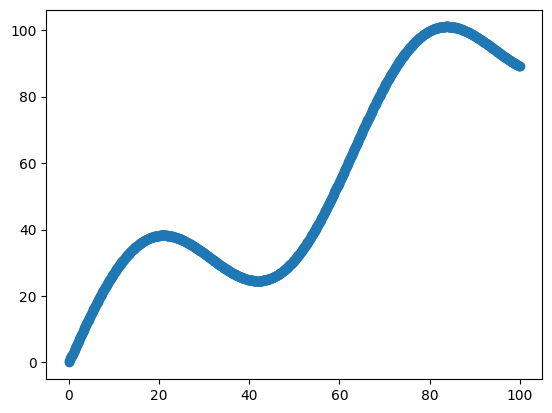

In [3]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# Define input data
X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)
# Plot input data
plt.scatter(X_data, y_data)

n_samples = 1000
batch_size = 100
# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))
# Define variables to be learned
with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights", (1, 1),initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias", (1,),
    initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y - y_pred)**2/n_samples)
# Sample code to run one step of gradient descent
opt = tf.train.AdamOptimizer()
opt_operation = opt.minimize(loss)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    sess.run([opt_operation], feed_dict={X: X_data, y: y_data})
# Sample code to run full gradient descent:
# Define optimizer operation
opt_operation = tf.train.AdamOptimizer().minimize(loss)
with tf.Session() as sess:
    # Initialize Variables in graph
    sess.run(tf.initialize_all_variables())
    # Gradient descent loop for 500 steps
    for _ in range(500):
    # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        # Do gradient descent step
        loss_val = sess.run([opt_operation, loss], feed_dict={X: X_batch, y: y_batch})

ValueError: Cannot feed value of shape (1000, 1) for Tensor Placeholder_2:0, which has shape (100, 1)

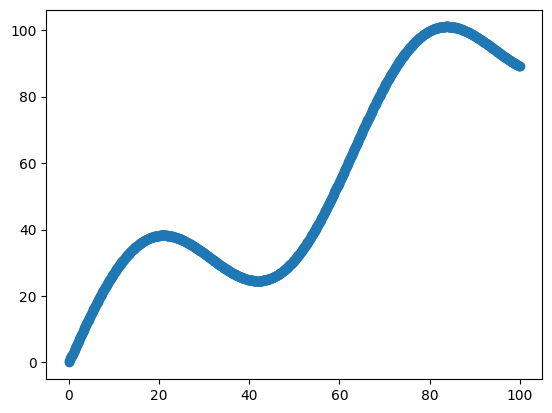

In [4]:
import numpy as np
import seaborn
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

# Define input data
X_data = np.arange(100, step=.1)
y_data = X_data + 20 * np.sin(X_data/10)
# Plot input data
plt.scatter(X_data, y_data)

n_samples = 1000
batch_size = 100
# Tensorflow is finicky about shapes, so resize
X_data = np.reshape(X_data, (n_samples,1))
y_data = np.reshape(y_data, (n_samples,1))
# Define placeholders for input
X = tf.placeholder(tf.float32, shape=(batch_size, 1))
y = tf.placeholder(tf.float32, shape=(batch_size, 1))
# Define variables to be learned
with tf.variable_scope("linear-regression"):
    W = tf.get_variable("weights3", (1, 1),initializer=tf.random_normal_initializer())
    b = tf.get_variable("bias3", (1,),
    initializer=tf.constant_initializer(0.0))
    y_pred = tf.matmul(X, W) + b
    loss = tf.reduce_sum((y - y_pred)**2/n_samples)
# Sample code to run one step of gradient descent
opt = tf.train.AdamOptimizer()
opt_operation = opt.minimize(loss)
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    sess.run([opt_operation], feed_dict={X: X_data, y: y_data})
# Sample code to run full gradient descent:
# Define optimizer operation
opt_operation = tf.train.AdamOptimizer().minimize(loss)
with tf.Session() as sess:
    # Initialize Variables in graph
    sess.run(tf.initialize_all_variables())
    # Gradient descent loop for 500 steps
    for _ in range(500):
    # Select random minibatch
        indices = np.random.choice(n_samples, batch_size)
        X_batch, y_batch = X_data[indices], y_data[indices]
        # Do gradient descent step
        loss_val = sess.run([opt_operation, loss], feed_dict={X: X_batch, y: y_batch})

In [5]:
# Generate a sample dataset from random data: 
random.seed(123)
def CreateDataset(N):
 a,b,c,y = [],[],[],[]
 for i in range(N):    
  aa = i/10+random.uniform(-4,3)
  bb = i/30+random.uniform(-4,4)
  cc = i/40+random.uniform(-3,3)-5
  yy = (aa+bb+cc/2)/3
  a.append([aa])
  b.append([bb])
  c.append([cc])
  y.append([yy])
 return np.hstack([a,b,c]), np.array(y)

N = 150
x,y = CreateDataset(N)
x_ax = range(N)
plt.plot(x_ax, x, 'o', label="original value", markersize=3)
plt.plot(x_ax, y, lw=1.5, color="red", label="y")
plt.legend(['original value'])
plt.show()




NameError: name 'random' is not defined

NameError: name 'x_val' is not defined